In [24]:
import numpy as np
from matplotlib import pyplot as plt
from gwaxion import physics

import matplotlib

mplparams = {
    'text.usetex': True,  # use LaTeX for all text
    'axes.linewidth': 1,  # set axes linewidths to 0.5
    'axes.grid': False,  # add a grid
    'axes.labelweight': 'normal',
    'font.family': 'serif',
    'font.size': 24,
    'font.serif': 'Computer Modern Roman'
}
matplotlib.rcParams.update(mplparams)

Imagine we are targeting a specific black hole with initial known mass ($60 M_\odot$) and spin (0.7), at a distance of 5 Mpc:

In [25]:
bh = physics.BlackHole(mass=60, chi=0.7, msun=True)
distance = 5E6 * physics.PC_SI

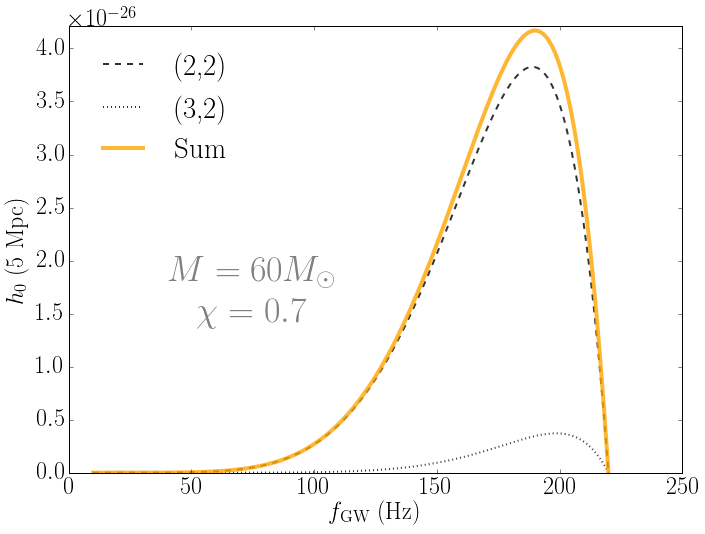

In [68]:
fgws = np.arange(10, 300, 1)

h02 = bh.h0r_fit(fgws)/distance
h03 = bh.h0r_fit(fgws, lgw=3)/distance

fig, ax = plt.subplots(1,figsize=(11,8))

#fig = plt.figure(figsize=(11,8))
#ax2 = plt.subplot2grid((3, 3), (0, 0), colspan=3, rowspan=1)
#ax = plt.subplot2grid((3, 3), (1, 0), colspan=3, rowspan=3, sharex=ax2)
#plt.setp(ax2.get_xticklabels(), visible=False)

ax.plot(fgws, h02, label='(2,2)', lw=2, alpha=0.8, c='k', ls='--')
ax.plot(fgws, h03, label='(3,2)', lw=2, alpha=0.8, c='k', ls=':')
ax.plot(fgws, h02+h03, label='Sum', lw=4, alpha=0.8, c='orange')

#ax2.plot(fgws, h02/h03, lw=3, c='gray')
#ax2.set_yscale('log')

ax.set_xlim(0, 250)
ax.set_ylim(0, max(h02)*1.1)
ax.set_xlabel(r'$f_{\rm GW}$ (Hz)')
ax.set_ylabel(r'$h_0$ (5 Mpc)')

ax.annotate(r'$M=60 M_\odot$'+'\n'+r'$\chi=0.7$', xy=(0.3, 0.4), xycoords="axes fraction", 
            ha='center', va='center', fontsize=36, color='gray')

ax.legend(loc='best', frameon=False)#title=r'$(\tilde{l},\tilde{m})$')

fig.savefig('h0_fgw_hom.pdf', bbox_inches='tight')

plt.show(ax)

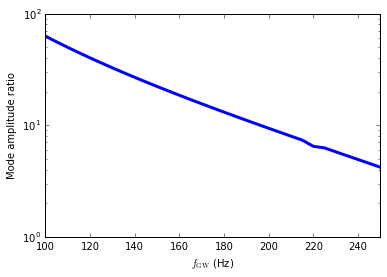

In [20]:
plt.plot(fgws, h02/h03, lw=3)
plt.xlim(100, 250)
plt.ylim(1, 1E2)
plt.yscale('log')
plt.xlabel(r"$f_{\rm GW}$ (Hz)")
plt.ylabel('Mode amplitude ratio')
plt.show()

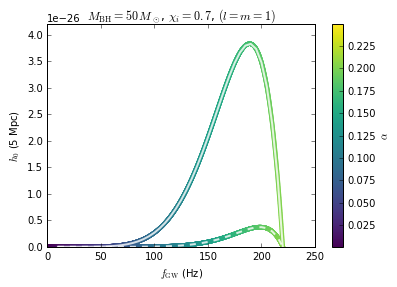

In [21]:
da = 0.0001
fig, ax = plt.subplots()
for lgw in [2, 3]:
    h0rs_loc, fgws_loc, alphas_loc = bh.scan_alphas(alpha_max=0.25, delta_alpha=da, lgw=lgw)
    h0s_loc = h0rs_loc / distance
    s = ax.scatter(fgws_loc, h0s_loc, c=alphas_loc, edgecolor='none', cmap='viridis')
plt.plot(fgws, h02, lw=2, color='w', alpha=0.8)
plt.plot(fgws, h03, lw=2, color='w', alpha=0.8, ls='--')
cb = plt.colorbar(s, label=r'$\alpha$')
ax.set_xlim(0, 250)
ax.set_ylim(0, max(h02)*1.1)
ax.set_xlabel(r"$f_{\rm GW}$ (Hz)")
ax.set_ylabel(r"$h_0$ (5 Mpc)")
plt.title(r"$M_{\rm BH}=50\,M_\odot$, $\chi_i=0.7$, $(l=m=1)$")
plt.legend(loc="upper left")
plt.show()
plt.close()